# Jaiver Barco
# Cod.202016908_44a

### Importamos las librerias 
librerias necesarias para ejecutar el codigo

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

**En esta parte se cambiaron los titulos de las columnas a Español**
//
luego se procede a describir la informacion del DataSet

In [31]:
tipo_de_dato = dataset['Genero'].dtype
print(f"El tipo de dato de la columna 'genero' es: {tipo_de_dato}")
tipo_de_dato = dataset['ID_Cliente'].dtype
print(f"El tipo de dato de la columna 'Id cliente' es: {tipo_de_dato}")
tipo_de_dato = dataset['Edad'].dtype
print(f"El tipo de dato de la columna 'Edad' es: {tipo_de_dato}")
tipo_de_dato = dataset['Ingreso_Anual'].dtype
print(f"El tipo de dato de la columna 'Ingreso' es: {tipo_de_dato}")
tipo_de_dato = dataset['Puntuacion_Gasto'].dtype
print(f"El tipo de dato de la columna 'Ingreso' es: {tipo_de_dato}")



El tipo de dato de la columna 'genero' es: int64
El tipo de dato de la columna 'Id cliente' es: int64
El tipo de dato de la columna 'Edad' es: int64
El tipo de dato de la columna 'Ingreso' es: int64
El tipo de dato de la columna 'Ingreso' es: int64


In [25]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv('./Mall.csv')
dataset.head(100)

ID_Cliente  Genero  Edad  Ingreso_Anual  Puntuacion_Gasto
0            1    Male    19             15                39
1            2    Male    21             15                81
2            3  Female    20             16                 6
3            4  Female    23             16                77
4            5  Female    31             17                40
..         ...     ...   ...            ...               ...
95          96    Male    24             60                52
96          97  Female    47             60                47
97          98  Female    27             60                50
98          99    Male    48             61                42
99         100    Male    20             61                49

[100 rows x 5 columns]

**Procedemos a buscar Datos o celdas con valores en 0**

In [32]:
print("Registros con cero en columna Genero",dataset['Genero'].isin([0]).sum() )

print("Registros con cero en columna Id_Cliente",dataset['ID_Cliente'].isin([0]).sum() )
print("Registros con cero en columna Edad",dataset['Edad'].isin([0]).sum() )
print("Registros con cero en columna Ingreso",dataset['Ingreso_Anual'].isin([0]).sum() )
print("Registros con cero en columna Puntuacion Gasto",dataset['Puntuacion_Gasto'].isin([0]).sum() )

Registros con cero en columna Genero 88
Registros con cero en columna Id_Cliente 0
Registros con cero en columna Edad 0
Registros con cero en columna Ingreso 0
Registros con cero en columna Puntuacion Gasto 0


**Aparece la columna Genero Dado que se reemplazaron por 0 y 1**
# 0 Corresponde a Hombre
# 1 Corresponde a Mujer

In [36]:
dataset.head()

ID_Cliente  Genero  Edad  Ingreso_Anual  Puntuacion_Gasto
0           1       0    19             15                39
1           2       0    21             15                81
2           3       1    20             16                 6
3           4       1    23             16                77
4           5       1    31             17                40

## Procedemos a Graficar para encontrar Valores Atipicos

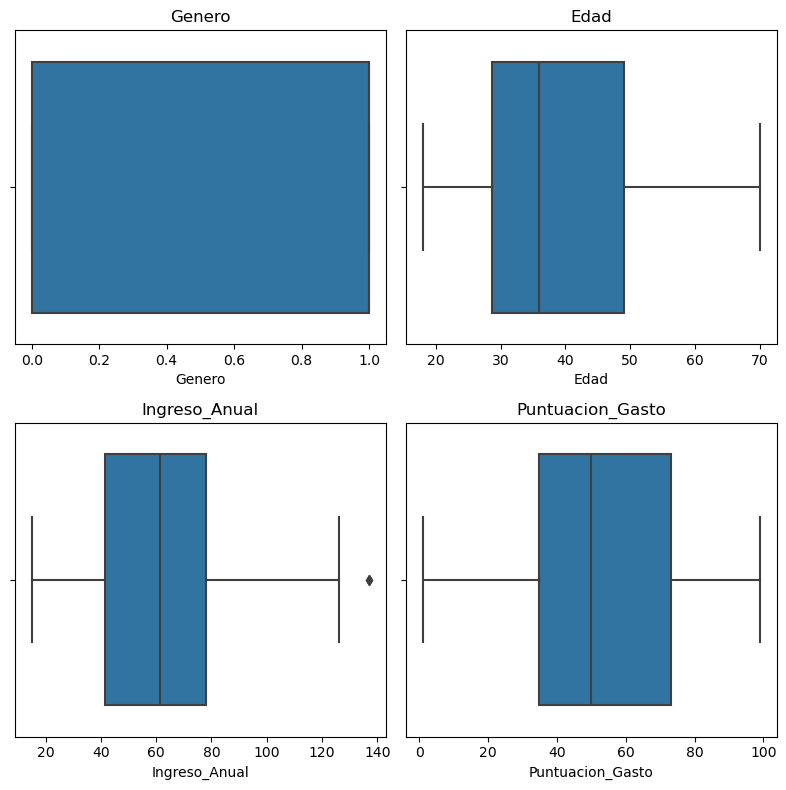

In [35]:
fig, axs = plt.subplots(2,2, figsize = (8,8))
titulos = ['Genero', 'Edad', 'Ingreso_Anual', 'Puntuacion_Gasto']
sns.boxplot(x=dataset['Genero'], ax=axs[0, 0]).set(title=titulos[0])
sns.boxplot(x=dataset['Edad'], ax=axs[0, 1]).set(title=titulos[1])
sns.boxplot(x=dataset['Ingreso_Anual'], ax=axs[1, 0]).set(title=titulos[2])
sns.boxplot(x=dataset['Puntuacion_Gasto'], ax=axs[1, 1]).set(title=titulos[3])

plt.tight_layout()
plt.show()

# en el ingreso anual tenemos datos atipicos los cuales pueden borrarse para tener un mejor analisis de la informacion

In [44]:
nivel_max=100
Total_atipicos=(dataset['Ingreso_Anual']>nivel_max).sum()
print("El total de Datos Atipicos es:{}".format(Total_atipicos))

El total de Datos Atipicos es:14


# se pensaba que eran solo pocos valores atipicos, sin embargo al tener 14 y tener una muestra tan baja, es mejor no borrarlos para no alterar los resultados
**Como El genero no es relevante para este estudio lo omitimos de las graficas**

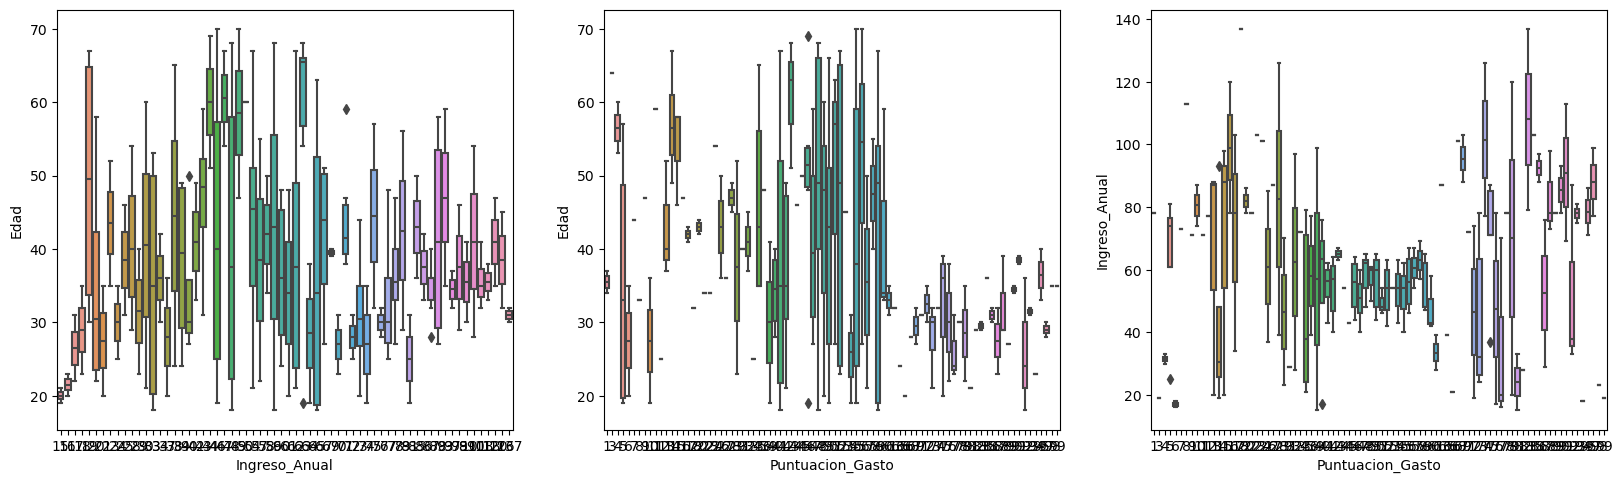

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Ingreso_Anual', y = 'Edad', data = dataset)
plt.subplot(2,3,2)
sns.boxplot(x = 'Puntuacion_Gasto', y = 'Edad', data = dataset)
plt.subplot(2,3,3)
sns.boxplot(x = 'Puntuacion_Gasto', y = 'Ingreso_Anual', data = dataset)
plt.show()


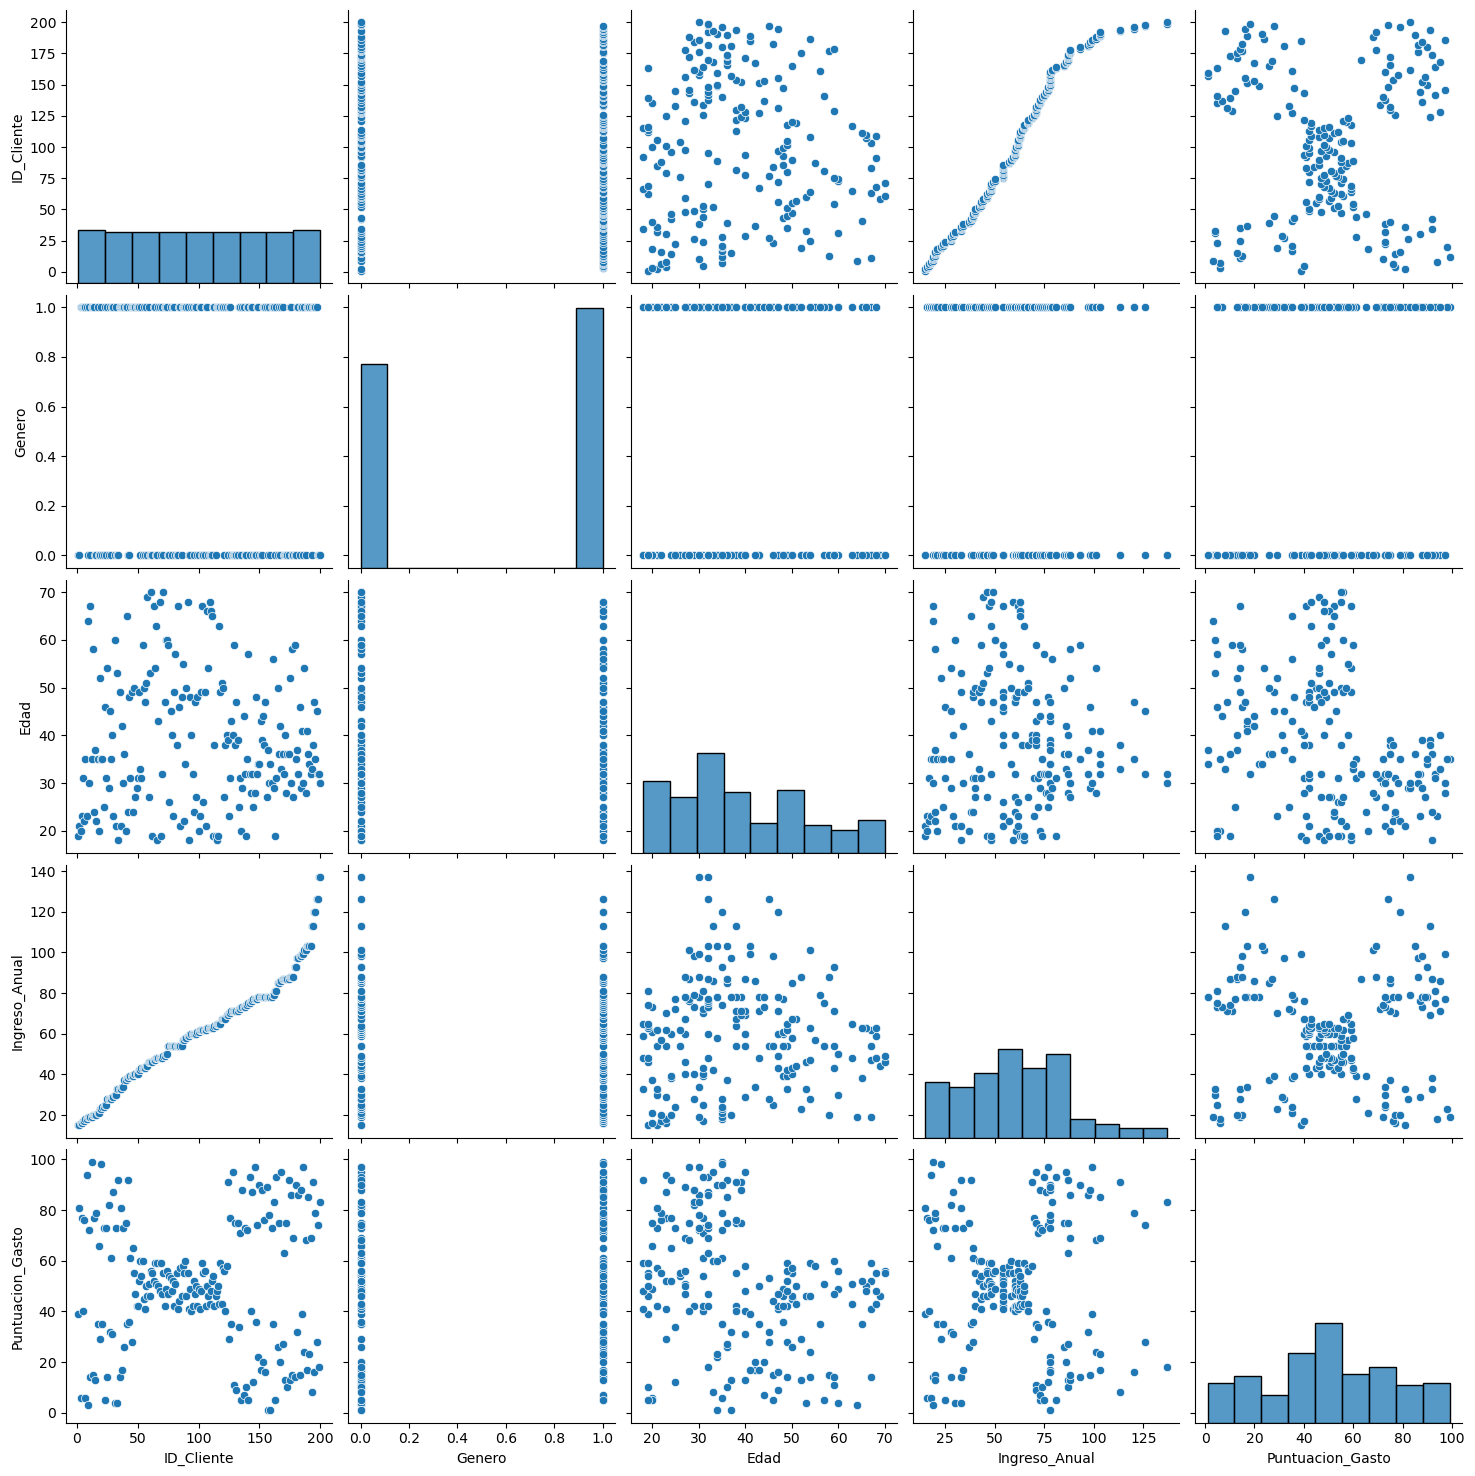

In [46]:
sns.pairplot(dataset.dropna(), size=3,kind='scatter')

**Matriz de Correlacion**

In [47]:
# Matriz de correlación
corr_matrix = dataset.corr()
corr_matrix

ID_Cliente    Genero      Edad  Ingreso_Anual  \
ID_Cliente          1.000000 -0.057400 -0.026763       0.977548   
Genero             -0.057400  1.000000 -0.060867      -0.056410   
Edad               -0.026763 -0.060867  1.000000      -0.012398   
Ingreso_Anual       0.977548 -0.056410 -0.012398       1.000000   
Puntuacion_Gasto    0.013835  0.058109 -0.327227       0.009903   

                  Puntuacion_Gasto  
ID_Cliente                0.013835  
Genero                    0.058109  
Edad                     -0.327227  
Ingreso_Anual             0.009903  
Puntuacion_Gasto          1.000000

# Diagramas de caja para cada variable por especie

<Axes: >

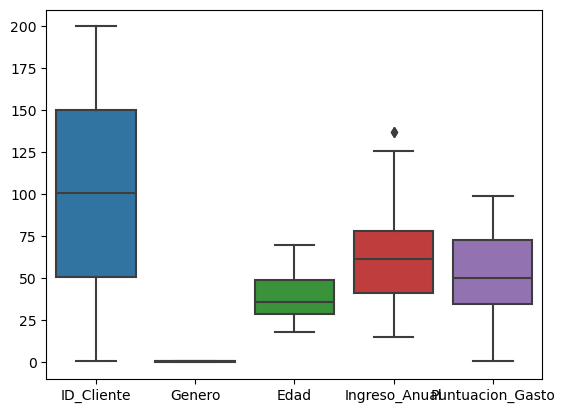

In [51]:
sns.boxplot(data=dataset)

# filtro el modelo, dado que el genero y el Id_ no es relevante para el estudio

In [52]:
Datos = dataset[["Edad","Ingreso_Anual","Puntuacion_Gasto"]]

In [54]:
Datos.describe()

Edad  Ingreso_Anual  Puntuacion_Gasto
count  200.000000     200.000000        200.000000
mean    38.850000      60.560000         50.200000
std     13.969007      26.264721         25.823522
min     18.000000      15.000000          1.000000
25%     28.750000      41.500000         34.750000
50%     36.000000      61.500000         50.000000
75%     49.000000      78.000000         73.000000
max     70.000000     137.000000         99.000000

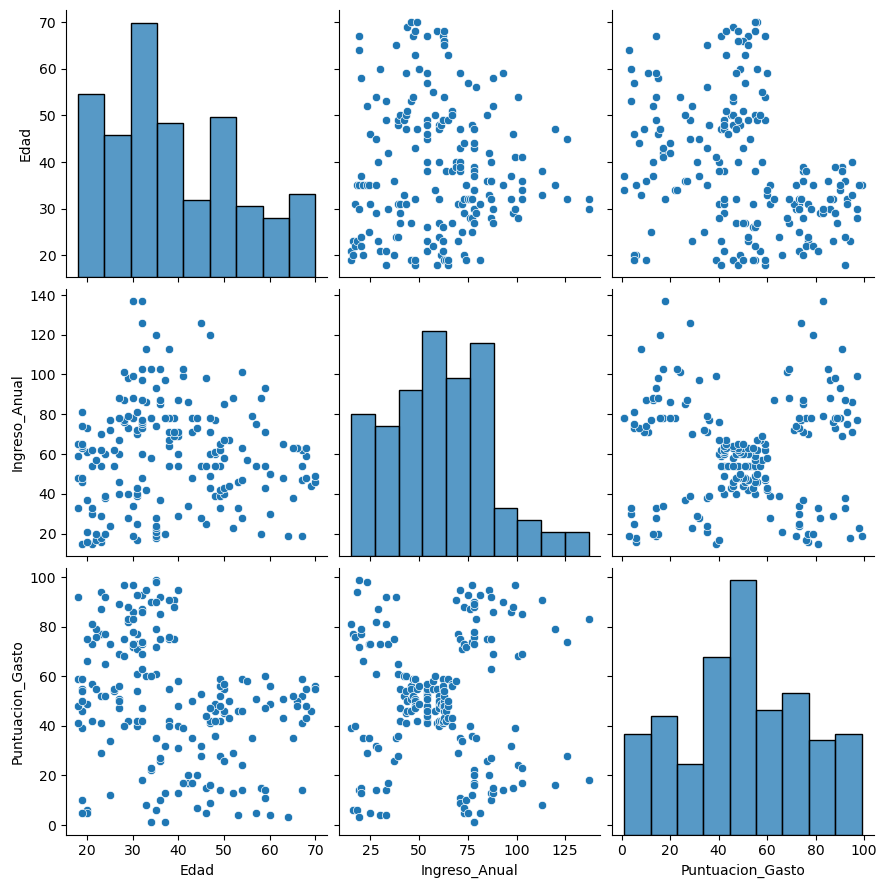

In [55]:
sns.pairplot(Datos.dropna(), size=3,kind='scatter')

**Entrenar El Modelo**
# Se realiza gráfica de codo para identificar valor de K


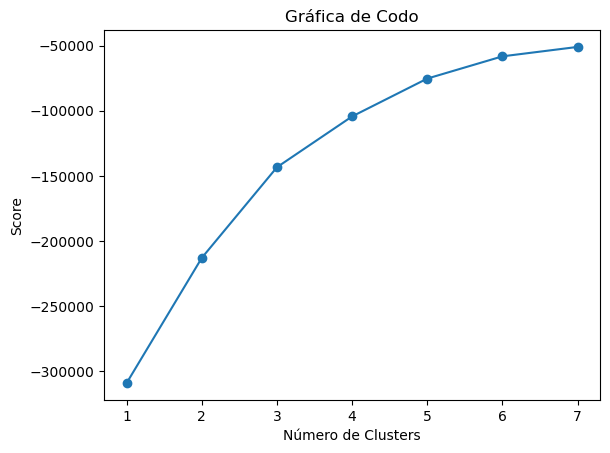

In [56]:

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

# Generación del modelo de Agrupamiento del modelo con K=6
**Debido a la informacion de la grafico podemos crear 6 Clausters 

In [63]:


Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=6, random_state=0)

# se identifican 6 grupos del 0 al 5

In [64]:
Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Edad  Ingreso_Anual  Puntuacion_Gasto  Grupo
0      19             15                39      5
1      21             15                81      3
2      20             16                 6      5
3      23             16                77      3
4      31             17                40      5
..    ...            ...               ...    ...
195    35            120                79      1
196    45            126                28      0
197    32            126                74      1
198    32            137                18      0
199    30            137                83      1

[200 rows x 4 columns]


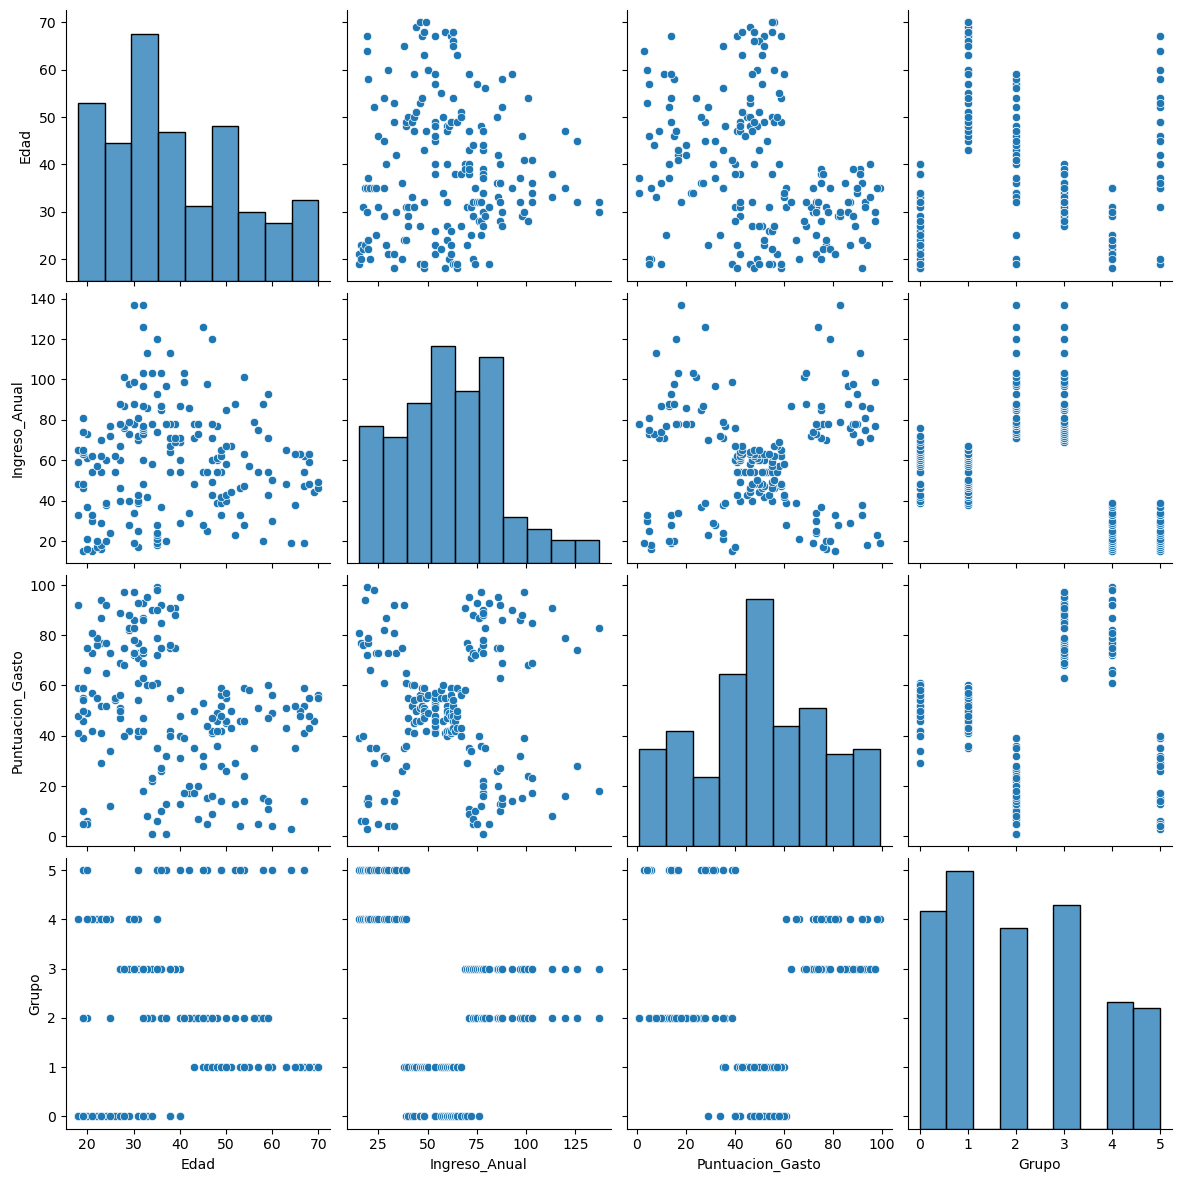

In [59]:
sns.pairplot(Datos.dropna(), size=3,kind='scatter')

# aqui identificamos nuevamente minimos y maximos de cada uno de los valores importantes del analisis

In [60]:
Datos.describe()

Edad  Ingreso_Anual  Puntuacion_Gasto       Grupo
count  200.000000     200.000000        200.000000  200.000000
mean    38.850000      60.560000         50.200000    2.125000
std     13.969007      26.264721         25.823522    1.600683
min     18.000000      15.000000          1.000000    0.000000
25%     28.750000      41.500000         34.750000    1.000000
50%     36.000000      61.500000         50.000000    2.000000
75%     49.000000      78.000000         73.000000    3.000000
max     70.000000     137.000000         99.000000    5.000000

# Se evalua el desempeño del Modelo


In [68]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.4523566166018854 |
| Indice Calinski Harabasz | 166.71357349776875 |
|  Indice Davies Bouldin   | 0.7443002999569567 |
+--------------------------+--------------------+


# Representacion grafica de los Modelos

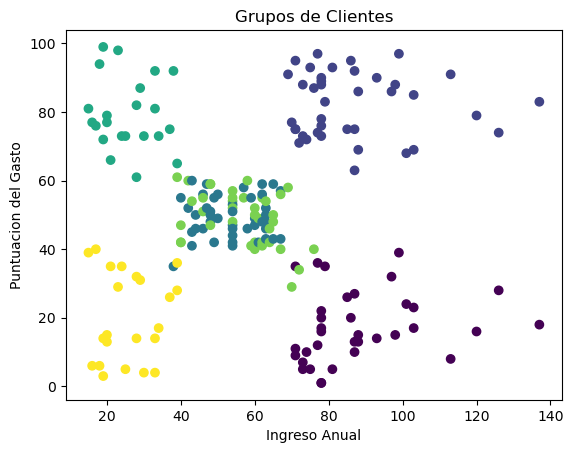

In [69]:
plt.scatter(Datos['Ingreso_Anual'], Datos['Puntuacion_Gasto'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuacion del Gasto')
plt.title('Grupos de Clientes')
plt.show()

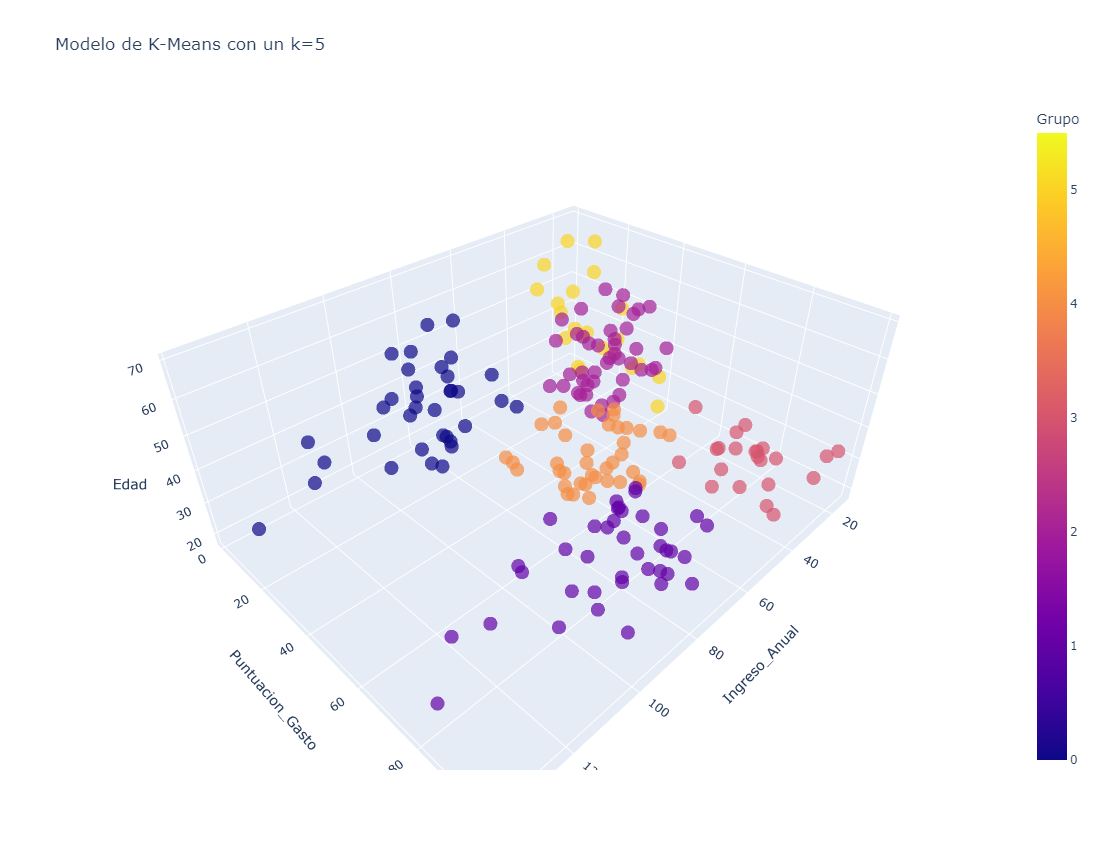

In [71]:
# Crear un modelo 3D de los datos agrupados
import plotly.express as px # Creación de gráficos en tres dimensiones
Grafica_3D = px.scatter_3d(Datos, x='Ingreso_Anual', y='Puntuacion_Gasto', z='Edad', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

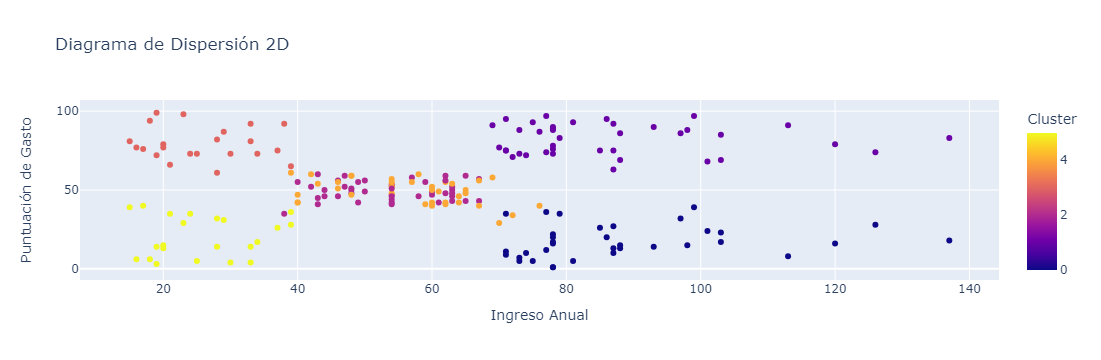

In [72]:
import plotly.express as px

# Crear un diagrama de dispersión en 2D
scatter_plot = px.scatter(Datos, x='Ingreso_Anual', y='Puntuacion_Gasto', color='Grupo', title='Diagrama de Dispersión 2D', 
                          labels={'Ingreso_Anual': 'Ingreso Anual', 'Puntuacion_Gasto': 'Puntuación de Gasto', 'Grupo': 'Cluster'})

scatter_plot.show()

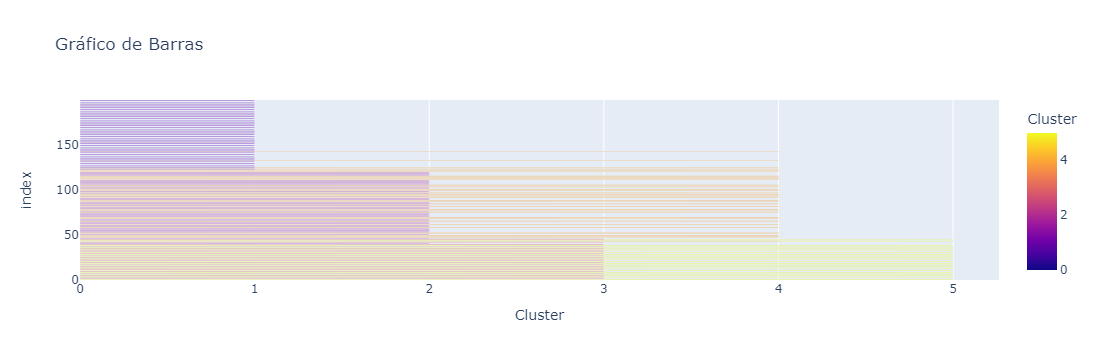

In [74]:
import plotly.express as px

# Crear un gráfico de barras
bar_plot = px.bar(Datos, x='Grupo', color='Grupo', title='Gráfico de Barras', 
                  labels={'Grupo': 'Cluster', 'Categoria': 'Categoría', 'value': 'Cantidad'})

bar_plot.show()

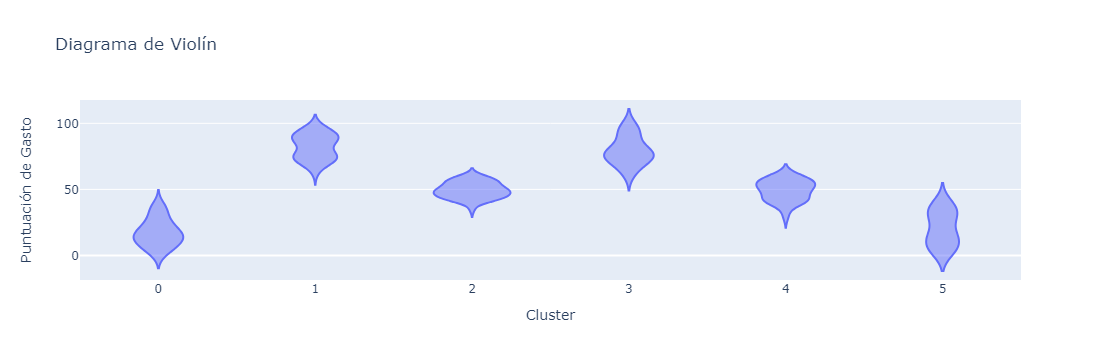

In [75]:
import plotly.express as px

# Crear diagrama de violín
violin_plot = px.violin(Datos, x='Grupo', y='Puntuacion_Gasto', title='Diagrama de Violín', 
                        labels={'Grupo': 'Cluster', 'Puntuacion_Gasto': 'Puntuación de Gasto'})

violin_plot.show()

## Conclusiones
# Coeficiente Silhouette  | 0.4523566166018854 |
# Este coeficiente mide la cohesión y la separación de los clusters. Toma valores en el rango [-1, 1],**
# **un valor de 0.4523566166018854 indica que los clusters tienen una buena separación y cohesión en general, lo que sugiere que el algoritmo de clustering ha generado agrupamientos significativos en los datos**
# **
| Indice Calinski Harabasz | 166.71357349776875 
# También conocido como criterio de varianza entre clusters, mide la dispersión entre los clusters y la dispersión dentro de los clusters. Valores más altos indican clusters más densos y bien separados.un valor de 166.71357349776875 sugiere que los clusters son densos y están bien separados, lo que es un indicativo de una buena calidad de agrupamiento.**|#
# **
|  Indice Davies Bouldin   | 0.74430029995695
# Este índice mide la "separación" entre los clusters y la "cohesión" dentro de los clusters. Valores más bajos indican una mejor calidad de agrupamiento, donde los clusters están bien separados y tienen una alta cohesión interna.un valor de 0.7443002999569567 indica que los clusters están relativamente bien separados y tienen una cohesión interna moderada. Aunque no es el valor más bajo posible, aún sugiere una buena calidad de agrupamiento.**67